Before we begin let's take a look at another library called Seaborn

# Seaborn 
Seaborn is built on top of matplotlib!
-2 main reasons why we learn this now
> - seaborn has some plotting functions which are easier to call that matlplotlib
>
> - seaborn comes with some datasets, we will helps us learn different types of plots, so that we dont have to spend time generating the data (https://github.com/mwaskom/seaborn-data)

# Import

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# I'm interested in the datasets available in seaborn, so that we can try out different plot types based on it
# Because irrespective of the plotting library, be it matplotlib or seaborn or plotly, the plot type <---> dataset type
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## 1. Box plots with Attention dataset

In [4]:
df = sns.load_dataset(name = 'attention')
print("Total number of rows:", len(df))
df.head()

Total number of rows: 60


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


### trial with matplotlib  - not able to get 2 boxes


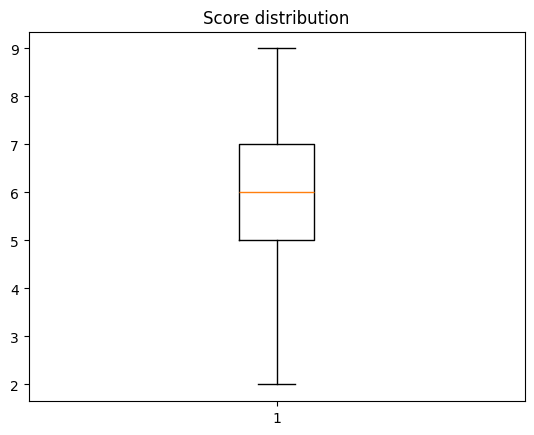

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(df['score'], )
plt.title("Score distribution")
plt.show()


As you can see this plot is not what we expected, based on the df, we should be able to divide data based on the attentiona and then see how the scores vary

### additional grouping


attention
divided    [2.0, 3.0, 3.0, 5.0, 4.0, 5.0, 5.0, 5.0, 2.0, ...
focused    [6.0, 8.0, 6.0, 8.0, 8.0, 6.0, 7.0, 7.0, 5.0, ...
Name: score, dtype: object
type is : <class 'pandas.core.series.Series'>


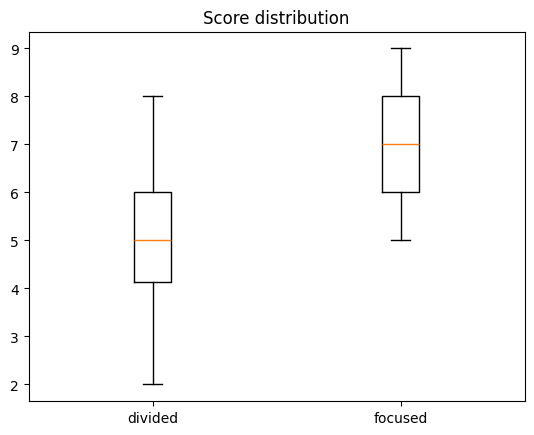

In [6]:
import matplotlib.pyplot as plt

grouped = df.groupby('attention')['score'].apply(list)
print(grouped)
print("type is :", type(grouped))
plt.boxplot(grouped, tick_labels=grouped.index)
plt.title("Score distribution")
plt.show()

How is this plot inferred?
- The focused group has an higher median compared to divided attention group. 
- The max score and min score of the focussed group is also better than the other
- there are few people in the divided group that performed better, than most , but they are minorities

### with seaborn

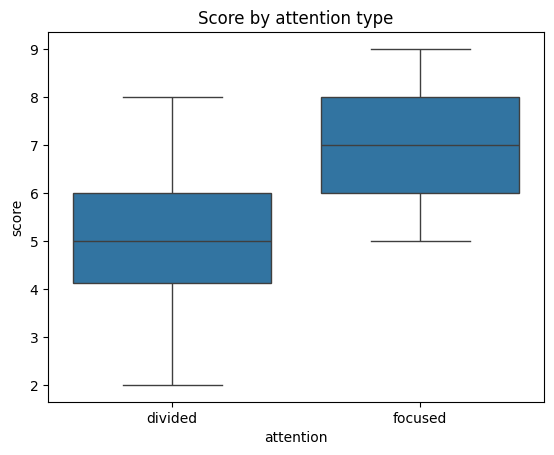

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#  with seaborn the plotting is much simpler, they handle the grouping internally
sns.boxplot(x="attention", y="score", data=df)
plt.title("Score by attention type")
plt.show()

# Let's learn what box plots are!
https://www.simplypsychology.org/boxplots.html

> -  First sort the data points in ascending order

> - the value in the middle is the median

> - the lower quartile (Q1) is the median of the lower half of the data OR comes at 25th percentile

> - the upper quartile (Q3) is the median of the upper half of the data OR comes at 75th percentile

> - the interquartile range (IQR) is Q3 - Q1

> - the "whiskers" are the lines that extend from the box to the highest and lowest values within 1.5 * IQR from Q3 and Q1

> - any data points outside this range are considered outliers and are plotted as individual points  


## 3. iris datset

In [20]:

df = sns.load_dataset("iris")
print("Total records:", df.shape[0])
df.head()   


Total records: 150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3.1 simple scaterr plot

<Axes: xlabel='sepal_length', ylabel='petal_width'>

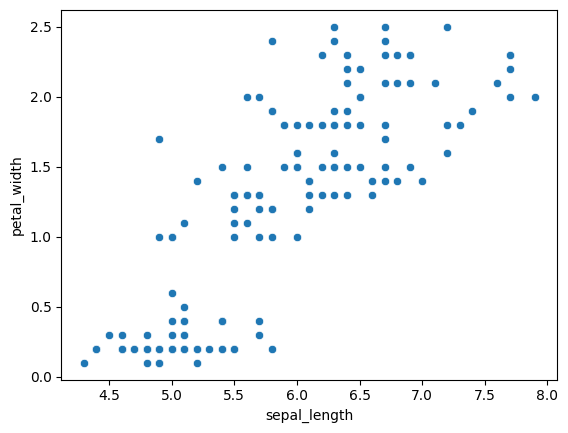

In [36]:
sns.scatterplot(x=df["sepal_length"], y=df["petal_width"])

### 3.2 simple scaterr plot with color

<Axes: xlabel='sepal_length', ylabel='petal_width'>

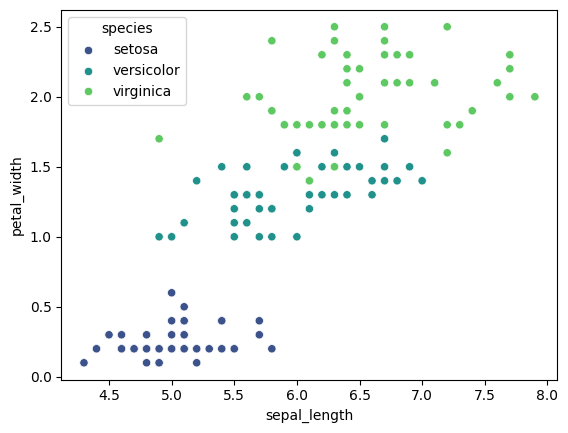

In [37]:
sns.scatterplot(x=df["sepal_length"], y=df["petal_width"], hue=df["species"], palette="viridis")

###  or you can use a Facetgrid

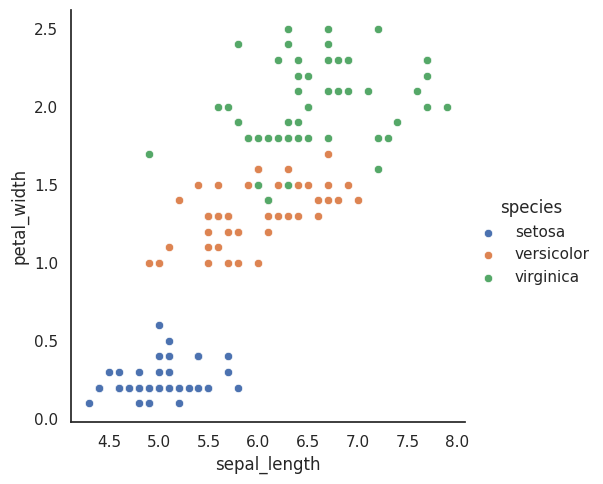

In [ ]:
sns.FacetGrid(df, hue="species", height=5).map(sns.scatterplot, "sepal_length", "petal_width").add_legend()
plt.show()

### 3.3 scaterr plot with histogram = joint plot

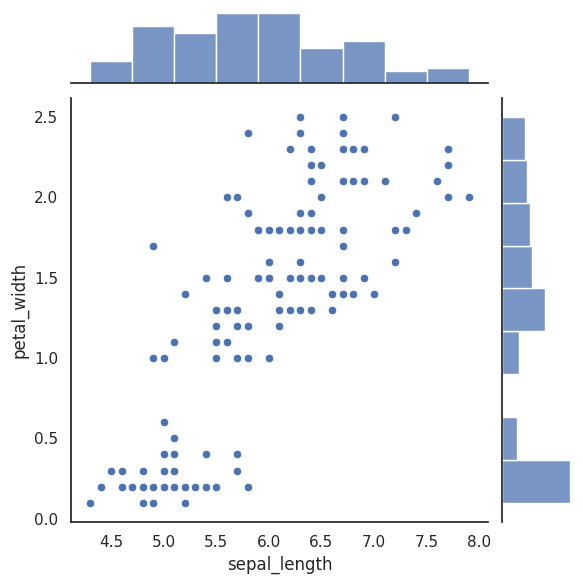

In [48]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["sepal_length"], y=df["petal_width"])
plt.show()

### scatter plot + color + continuous distribution = joint point

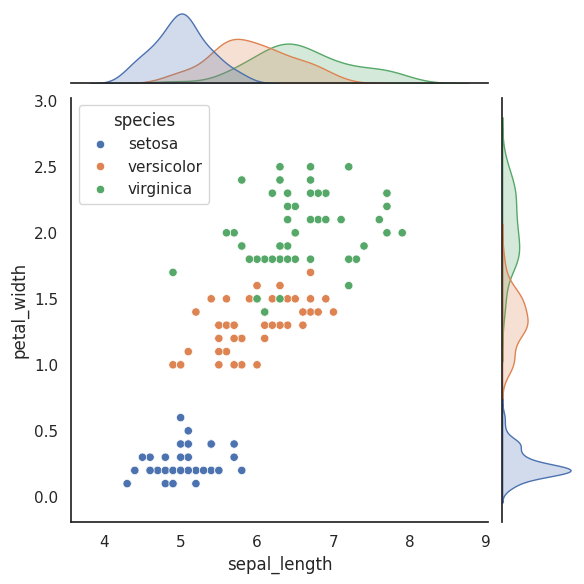

In [49]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["sepal_length"], y=df["petal_width"], hue=df["species"])
plt.show()

### box plots

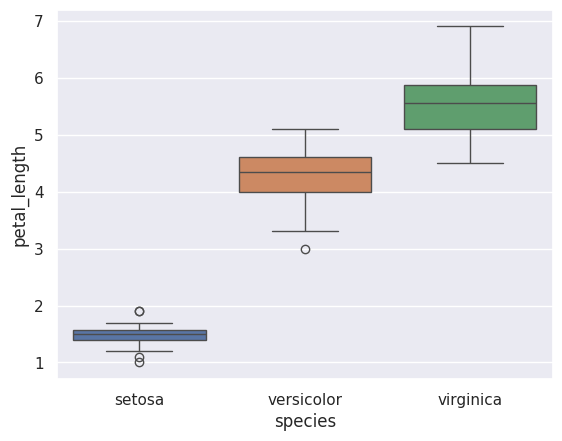

In [69]:
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(x="species", y="petal_length", hue="species", data=df )
plt.show()


### box plot + scatter POINTS = box plot+ strip plots

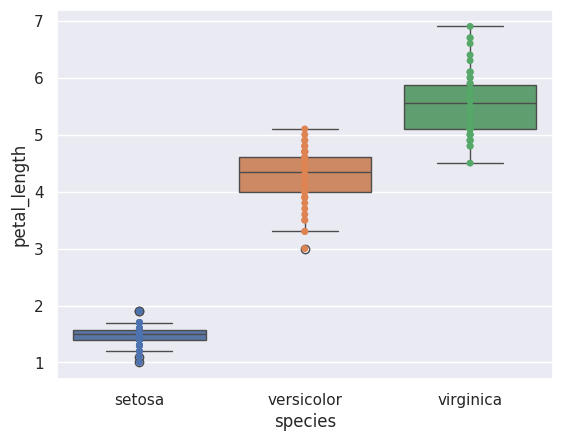

In [75]:
sns.boxplot(x="species", y="petal_length", hue="species", data=df )
# sns.scatterplot(x="species", y="petal_length", hue="species", data=df)
sns.stripplot(x="species", y="petal_length", hue="species", data=df, jitter=False)
plt.show()

<Axes: xlabel='sepal_length', ylabel='petal_width'>

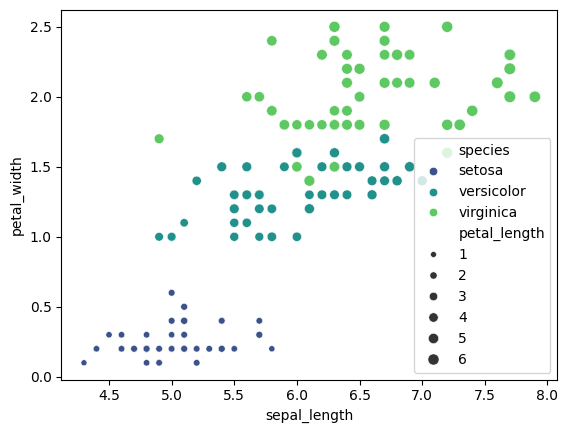

In [ ]:
import matplotlib.pyplot as plt


sns.scatterplot(x=df["sepal_length"], y=df["petal_width"], hue=df["species"], size = df['petal_length'],palette="viridis")

## 2. Brain networks

In [ ]:
df = sns.load_dataset("brain_networks")
print("Total records:", df.shape[0])
df.head()

Total records: 923


,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418


This is what happens when you load a dataset without knowing what its structure is!! 
https://seaborn.pydata.org/examples/structured_heatmap.html

In [ ]:

import pandas as pd
import seaborn as sns
# sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

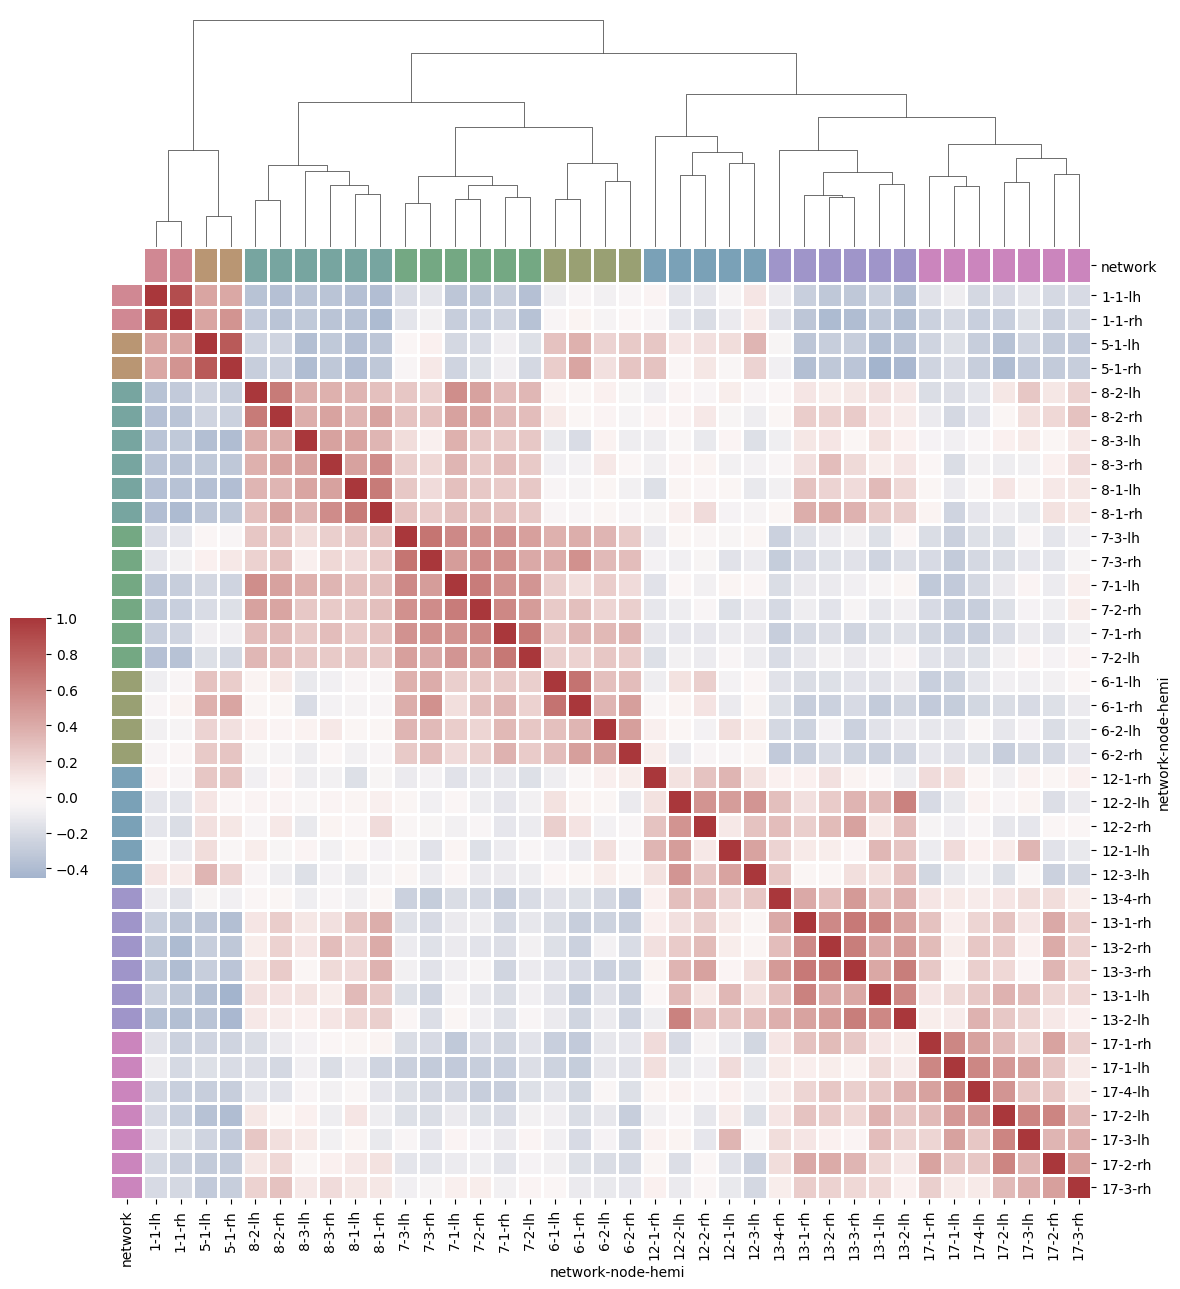

In [ ]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()
